# Python Data Mining Quick Start Guide
## Ch 3 - Collecting, Exploring, and Visualizing Data
### Copyright: Nathan Greeneltch, PhD 2019

#### These code examples and description are meant to accompany the book "Python Data Mining Quick Start Guide" by Nathan Greeneltch. For full background on the topics and introduction sections, please purchase the book. 

## Types of Data Sources and Loading into Pandas

This part of the chapter will show you how to load data in computer memory. This of course is essential to all downstream work and analysis. 

### Database

A relational database is one of the most common way that enterprises store data. So loading from and interacting with databases is essential to most field work. The python library we will use is **sqlite3** and is included in anaconda's package. let's begin with connecting to the database, which is stored in a .db file, and included with the book materials. After we connect, we will create a cursor object that we will use to traverse the object during a query. Finally, we will **SELECT** the entire contents of the "boston" table with the ***** condition and **LIMIT** the rows to 5 (only so that we can display the output without overloading our console). Finally we **execute()** the query and **fetchall()**. The data returned from the query is controlled by the search teams (SELECT and LIMIT) in this case. The next section will introduce more common terms used for queries. 

In [29]:
import sqlite3
sqlite_file = './data/boston.db' 

# connecting to the database file
conn = sqlite3.connect(sqlite_file)

# initialize a cursor obect
cur = conn.cursor()

# define a traversing search
cur.execute("select * from boston limit 5;")

# fetch and print
data = cur.fetchall()
print(data)

[(0, 0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.09, 1.0, 296.0, 15.3, 396.9, 4.98, 24.0), (1, 0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.9, 9.14, 21.6), (2, 0.02729, 0.0, 7.07, 0.0, 0.469, 7.185, 61.1, 4.9671, 2.0, 242.0, 17.8, 392.83, 4.03, 34.7), (3, 0.03237, 0.0, 2.18, 0.0, 0.458, 6.998, 45.8, 6.0622, 3.0, 222.0, 18.7, 394.63, 2.94, 33.4), (4, 0.06905, 0.0, 2.18, 0.0, 0.458, 7.147, 54.2, 6.0622, 3.0, 222.0, 18.7, 396.9, 5.33, 36.2)]


The output from the **print()** statement above is 5 records each with 15 entries, corresponding to rows and columns of the data table, respectively.

NOTE: For our example we use the included database (.db) file in place of an actual remote database. This means we will "connect" to this file. In practice you will connect to a remote location using a network address and login credentials. 

#### Basic SQL Queries

"Structured Query Language" (**SQL**) is the language used to interact with data in a database. There are different variants of query syntax among versions, but the general idea is the same across them all. The concept of SQL searching is best conveyed by examples, so this section will demonstrate some common SQL search terms with easily adaptable and transferable examples. 

NOTE: These examples build on the connection and cursor objects from the last section. 

First, let's Select only from the "ZN" column, and filter in only values above:

In [30]:
cur.execute("select ZN from boston where ZN > 0.0;")
data = cur.fetchall()
print(data)

[(18.0,), (12.5,), (12.5,), (12.5,), (12.5,), (12.5,), (12.5,), (12.5,), (75.0,), (75.0,), (21.0,), (21.0,), (21.0,), (21.0,), (75.0,), (90.0,), (85.0,), (100.0,), (25.0,), (25.0,), (25.0,), (25.0,), (25.0,), (25.0,), (17.5,), (80.0,), (80.0,), (12.5,), (12.5,), (12.5,), (25.0,), (25.0,), (25.0,), (25.0,), (28.0,), (28.0,), (28.0,), (45.0,), (45.0,), (45.0,), (45.0,), (45.0,), (45.0,), (60.0,), (60.0,), (80.0,), (80.0,), (80.0,), (80.0,), (95.0,), (95.0,), (82.5,), (82.5,), (95.0,), (95.0,), (30.0,), (30.0,), (30.0,), (30.0,), (30.0,), (30.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (80.0,), (80.0,), (90.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (40.0,), (40.0,), (40.0,), (40.0,), (40.0,), (20.0,), (20.0,), (20.0,), (20.0,), (90.0,), (90.0,), (55.0,), (80.0,), (52.5,), (52.5,), (52.5,), (80.0,), (80.0,), (80.0,), (70.0,),

The output from the print() statement above is hard to understand because there is no language and a lack of structure. 

You have two choices to deal with the unstructured program. You can code around it and do the bookkeeping yourself with mapping that labels this output with the column "ZN" and any other constraints on the search. Alternatively, you can get use **Pandas** built-in SQL capability and  put the results of queries directly into a dataframe. I recommend the latter strategy and will demonstrate its power in the rest of the section.

First lets duplicate our original query for the entire table, limited to 5 rows. Please note how the actual search syntax (_select * from boston limit 5_) is the same as the direct **sqlite3** code we pass earlier, so there's not much new to learn. 

In [31]:
import pandas as pd
# get all data inside boston table limited to 5 rows
df = pd.read_sql_query("select * from boston limit 5;", conn)
print("df.shape = " + str(df.shape))

df.shape = (5, 15)


We limited our original query example to 5 lines so we would't overwhelm our console. Since we are now working with Pandas, this is not longer needed. Additionally we now have all of the powerful Pandas data analysis functions are our disposable. Now let's grab the whole table and used Pandas to sanity check with the **head()** method and print our a summary for us with the **describe()** method.

In [32]:
# get all data inside boston table
df = pd.read_sql_query("select * from boston;", conn)
print("df.shape = " + str(df.shape))
print("Sanity check with Pandas head():")
print(df.head())
print("Summarize with Pandas describe():")
print(df.describe().transpose())

df.shape = (506, 15)
Sanity check with Pandas head():
   record     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0       0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1       1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2       2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3       3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4       4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
Summarize with Pandas describe():
         count        mean         std        min         25%        50%  \
record   506.0  252.500000  146.213884    0.00000  126.250000  252.50000   
CRIM     506.0    3.593761    8.596783    0.00632    0.082045    0.25

NOTE: Viewing these few lines of code above should  ignite your imagination. Hopefully the power of Pandas and Python's interactive console becomes immediately apparent and you can see why Python has been adopted as the default data mining and analytics language by the majority of new users in the last decade. Seaborn (plotting) and Scikit-learn  (machine learning) are just as powerful and complete the Python data mining package.  Learn these packages and wield them for power in analysis. 

Let's continue with a few more helpful examples:

In [33]:
# get all data inside boston table that has ZN values greater 0
df = pd.read_sql_query("select * from boston where ZN > 0.0;", conn)
print("df.shape = " + str(df.shape))
df.head()

df.shape = (134, 15)


,record,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
2,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
3,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
4,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


Now let's chain a couple sql commands together and filter in records greater than 250 as well:

In [34]:
# same as above with additional filtering in of records greater than 250
df = pd.read_sql_query("select * from boston where ZN > 0.0 and record > 250;", conn)
print("df.shape = " + str(df.shape))
df.head()

df.shape = (66, 15)


,record,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,251,0.21409,22.0,5.86,0.0,0.431,6.438,8.9,7.3967,7.0,330.0,19.1,377.07,3.59,24.8
1,252,0.08221,22.0,5.86,0.0,0.431,6.957,6.8,8.9067,7.0,330.0,19.1,386.09,3.53,29.6
2,253,0.36894,22.0,5.86,0.0,0.431,8.259,8.4,8.9067,7.0,330.0,19.1,396.90,3.54,42.8
3,254,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57,21.9
4,255,0.03548,80.0,3.64,0.0,0.392,5.876,19.1,9.2203,1.0,315.0,16.4,395.18,9.25,20.9


For long queries, it is convention to spread over multiple short lines for easy reading, for example:

In [35]:
# example of multiline search syntax
df = pd.read_sql_query("""
                       select record, ZN, AGE, TAX from boston
                       where ZN > 0.0 and CRIM < 2.5;
                       """,
                       conn)
print(df.head())

   record    ZN    AGE    TAX
0       0  18.0   65.2  296.0
1       6  12.5   66.6  311.0
2       7  12.5   96.1  311.0
3       8  12.5  100.0  311.0
4       9  12.5   85.9  311.0


A final note: if you make changes to the dataframe and want to commit those back to the SQl database, you can use the built-in Pandas function for committing: 

In [36]:
# use Pandas 'to_sql' method to commit changes to connection
df.to_sql("./data/boston_updated", conn, if_exists="replace")
# close connection
conn.close()

### Disk

Often data is already stored locally on a disk, for example a hard drive or portable media. Loading into Pandas from disk is easy as long as file is in csv format:

In [37]:
# load from file
df = pd.read_csv("./data/iris.csv")
print(df.head())

   sepal length in cm  sepal width in cm  petal length in cm  \
0                 5.1                3.5                 1.4   
1                 4.9                3.0                 1.4   
2                 4.7                3.2                 1.3   
3                 4.6                3.1                 1.5   
4                 5.0                3.6                 1.4   

   petal width in cm species  
0                0.2  setosa  
1                0.2  setosa  
2                0.2  setosa  
3                0.2  setosa  
4                0.2  setosa  


Saving dataframe changes to a file is simple:

### Web Sources

Many datasets are made available on the web. If you have the address, you can pull them from inside your python script. Also, Scikit-learn and Seaborn has some built-in datasets you can use. Depending on the distribution you acquire, the datasets may or may not come bundled. If they are not bundled, then the first time you try to load them, python will look online and download the dataset for you, and store a local copy for later use. 

#### From URL

To pull dataset from from URL:

In [39]:
# load from web URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal length in cm', 'sepal width in cm', 'petal length in cm',
       'petal width in cm', 'species']
df = pd.read_csv(url, names=names)
print(df.head())

   sepal length in cm  sepal width in cm  petal length in cm  \
0                 5.1                3.5                 1.4   
1                 4.9                3.0                 1.4   
2                 4.7                3.2                 1.3   
3                 4.6                3.1                 1.5   
4                 5.0                3.6                 1.4   

   petal width in cm      species  
0                0.2  Iris-setosa  
1                0.2  Iris-setosa  
2                0.2  Iris-setosa  
3                0.2  Iris-setosa  
4                0.2  Iris-setosa  


#### From Scikit-learn and Seaborn Included Sets

Some datasets come built-in the Scikit-learn and Seaborn.

Here is a Scikit-learn example: See https://scikit-learn.org/stable/datasets/index.html﻿

In [41]:
# load from web Scikit-learn
from sklearn.datasets import load_iris
dataset = load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['species'] = dataset.target
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


Here is a Seaborn examples: See https://seaborn.pydata.org/generated/seaborn.load_dataset.html﻿

In [42]:
# load from Seaborn
import seaborn as sns
df = sns.load_dataset("flights")
print(df.head())


   year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121


## Access, Search, and Sanity Checks with Pandas

Pandas includes some built-in access functions and search/filter functions to make life easier for users. Pandas also has some sanity checks available for you to quickly view your data and make sure you have the correct batch loaded. For example, we've used the **head()** method, which displays the first five rows with column names, as a way to check which data we loaded in the beginning of this chapter. Don't by shy about sanity checks. If your company has a large amount of money riding on the outcome of your analysis, the last thing you want to do is mistakenly work with the wrong data loaded. 

TIP: For adhoc work in the ipython console, you don't have to include print statements to send your output to a console. For example, you can pass simply df.head() into ipython console and return first five rows. This trick applies to most Pandas and Seaborn bundled methods. This is how many Python users apply trial and error quickly to their problem statements. If, however, you are passing your code through a normal python interpreter you would need to call this method with print(df.head()) in order to print to console.  I use the print statements in this section, but feel free to play around in the included ipython notebooks and get a feel for use without the print statements.

NOTE: For more helpful methods, check out the official Pandas documentation. Just about every practitioner I know bookmarks this page and refers to it constantly: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html﻿

Before we move on, first load data from the included boston.db file:

In [43]:
import pandas as pd
import sqlite3
sqlite_file = './data/boston.db' 
# Connecting to the database file
conn = sqlite3.connect(sqlite_file)


df = pd.read_sql_query("select * from boston;", conn)
print("df.shape = " + str(df.shape))
df.set_index("record", inplace=True)
conn.close()


df.shape = (506, 15)


Now lets look at a list of most common Pandas methods that many practitioners use on an almost daily basis:

In [46]:
# print first 5 rows with column names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
record,,,,,,,,,,,,,,
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Let's use some more Pandas sanity checks to check understand more about the data we've loaded: 

In [47]:
# get amount of rows and columns
print(df.shape)
# get columns in the dataframe
print(df.columns)

(506, 14)
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


and now use the **.describe()** method to easily get some summary statistics:

In [48]:
# get statistical summary
df.describe()
# view in transposed form
print(df.describe().transpose())

         count        mean         std        min         25%        50%  \
CRIM     506.0    3.593761    8.596783    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
CHAS     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
B        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
LSTAT    506

We can use Pandas built-in .min(), .max(), .mean(), and .median() methods as well. Let's do that now: 

In [49]:
# get max and min values
df.max()
df.min()
# get mean and median values
df.mean()
print(df.median())

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
MEDV        21.20000
dtype: float64


Now let's get the index of maximum and minimum values with .idmax(), .idmin() methods:

In [50]:
# get index of max and min values
df.idxmax()
print(df.idxmin())

CRIM         0
ZN           1
INDUS      195
CHAS         0
NOX        286
RM         365
AGE         41
DIS        372
RAD          0
TAX        353
PTRATIO    196
B          450
LSTAT      161
MEDV       398
dtype: int64


The numbers in the above output are the index/row locations of minimum value in each column.

And we can get specific rows with ease (index=0 of "CRIM" column):

In [25]:
# get first row of data (index=0)
df.loc[0]
# get third row of data (index=2)
df.loc[2]
# get first row of CRIM column
print(df.loc[0]['CRIM'])

0.00632


We can also isolate single columns:

In [15]:
# isolate single columns
df['AGE'].mean()
df['MEDV'].idxmax()
print(df['AGE'].idxmin())

41


The above output is the index of minimum of "AGE" column.

We can even sort  on specific columns with the "by" arg. Note that Pandas **.sort()** method uses ascending order by default: 

In [51]:
# sort (ascending by default)
df.sort_values(by = 'ZN')
# sort descending
df.sort_values(by = 'ZN', ascending = False)
print(df.sort_values(by = 'ZN', ascending = False).head())

           CRIM     ZN  INDUS  CHAS     NOX     RM   AGE     DIS  RAD    TAX  \
record                                                                         
57      0.01432  100.0   1.32   0.0  0.4110  6.816  40.5  8.3248  5.0  256.0   
204     0.02009   95.0   2.68   0.0  0.4161  8.034  31.9  5.1180  4.0  224.0   
203     0.03510   95.0   2.68   0.0  0.4161  7.853  33.2  5.1180  4.0  224.0   
200     0.01778   95.0   1.47   0.0  0.4030  7.135  13.9  7.6534  3.0  402.0   
199     0.03150   95.0   1.47   0.0  0.4030  6.975  15.3  7.6534  3.0  402.0   

        PTRATIO       B  LSTAT  MEDV  
record                                
57         15.1  392.90   3.95  31.6  
204        14.7  390.55   2.88  50.0  
203        14.7  392.78   3.81  48.5  
200        17.0  384.30   4.45  32.9  
199        17.0  396.90   4.56  34.9  


The output above is the full table sorted in descending order on "ZN" column.

NOTE: The previous code snippet only produces a sorted view of the data. It's essentially a disposable, one-time use representation of the data in sorted form. The original data in memory has not been altered. A permanent sort of a Pandas dataframe requires the "inplace" arg. 

Now let's do a permanent sort on the table with the "inplace" arg, permanently changing how its stored in memory:

In [26]:
# permanently sort the table
df.sort_values(by = 'ZN', inplace=True)
# now call df.head() on permanently sorted table
print(df.head())

            CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
record                                                                         
505      0.04741  0.0  11.93   0.0  0.573  6.030   80.8  2.5050   1.0  273.0   
439      9.39063  0.0  18.10   0.0  0.740  5.627   93.9  1.8172  24.0  666.0   
440     22.05110  0.0  18.10   0.0  0.740  5.818   92.4  1.8662  24.0  666.0   
441      9.72418  0.0  18.10   0.0  0.740  6.406   97.2  2.0651  24.0  666.0   
442      5.66637  0.0  18.10   0.0  0.740  6.219  100.0  2.0048  24.0  666.0   

        PTRATIO       B  LSTAT  MEDV  
record                                
505        21.0  396.90   7.88  11.9  
439        20.2  396.90  22.88  12.8  
440        20.2  391.45  22.11  10.5  
441        20.2  385.96  19.52  17.1  
442        20.2  395.69  16.59  18.4  


In case we change our minds and want to undo the permanent sort, we can sort on the original index column and get our original data back:

In [52]:
# sort back on index
df.sort_values(by = 'record', inplace=True)
print(df.head())

           CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
record                                                                       
0       0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1       0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2       0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3       0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4       0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

        PTRATIO       B  LSTAT  MEDV  
record                                
0          15.3  396.90   4.98  24.0  
1          17.8  396.90   9.14  21.6  
2          17.8  392.83   4.03  34.7  
3          18.7  394.63   2.94  33.4  
4          18.7  396.90   5.33  36.2  


As a final example, let's chain together a couple filters and use the **.describe()** method for some summary statistics of the smaller, filtered dataset: 

In [30]:
# filter dataframe to show only even records
df[df.index % 2 == 0]
# filter dataframe to show only record with AGE greater than 95
df[df['AGE'] > 95]
# get statistical summary of the filtered table
df[df['AGE'] > 95].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,111.0,9.131193,12.525663,0.09849,1.20826,5.87205,11.7645,73.5341
ZN,111.0,0.585586,3.125317,0.00000,0.00000,0.00000,0.0000,20.0000
INDUS,111.0,17.862342,4.606760,2.46000,18.10000,18.10000,19.5800,27.7400
CHAS,111.0,0.063063,0.244179,0.00000,0.00000,0.00000,0.0000,1.0000
NOX,111.0,0.664649,0.093411,0.44800,0.60500,0.65900,0.7000,0.8710
RM,111.0,5.940144,0.712860,3.86300,5.49400,6.00600,6.4030,7.9290
AGE,111.0,98.280180,1.657864,95.20000,96.95000,98.40000,100.0000,100.0000
DIS,111.0,1.999828,0.873839,1.13700,1.52335,1.80260,2.1088,6.0821
RAD,111.0,15.153153,9.832412,2.00000,5.00000,24.00000,24.0000,24.0000
TAX,111.0,541.459459,156.998482,188.00000,403.00000,666.00000,666.0000,711.0000


## Basic Plotting in Seaborn

A thoughtfully built analytic plot can portray a relationship, trend, or historical recap in a single view. However, from working up and scaling the data, to organizing the labels and choosing a color scheme, to saving in the appropriate format, the steps to build the plot can be long and tedious. Tedious actions are the antithesis to the rapid prototyping that most practitioners want when they decide to use Python for their analytics and data mining. The **Seaborn** library bundles popular plotting routines in a single function call that is compatible with the **ipython console** and **Pandas dataframes** for quick and easy plotting. As a bonus, the plots look wonderful as well with easy-to-adjust aesthetics. 

The pseudocode for plotting in Seaborn is:

In [ ]:
import seaborn as sns 
sns.plot_type(dataframe)

That's it! Similar to the built-in methods for Pandas, these Seaborn routines should excite you by the sheer power they put at your fingertips with a single line of code.    

## Popular Types of Plots for Visualizing Data

The next section will introduce some of the most common plotting routines used by analysts in the data mining field. These are the plot types I see projected on screens in conference rooms on a daily basis at my work. The routines in Seaborn all follow similar argument convention and usage, so after reading through the examples in this section, you should easily be able to build any plot Seaborn has to offer with ease. 

TIP: I recommend you view the example gallery on Seaborn's website. It's a good way to find the plot your looking for. The front page includes fully rendered versions of each plot type: https://seaborn.pydata.org/examples/index.html ﻿

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# load iris
df = pd.read_csv("./data/iris.csv")
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Scatter Plot

The **scatter plot** is the most straightforward way to plot two variables against each other and visualize relationships between two variables. It is also a good place to start to learn the basics of Seaborn. Until recently, the Pandas **lmplot()** routine was the most common method for plotting scatters. However, in 2018 Pandas introduced a **scatterplot()** routine specifically for these plots. You can use either to get the job done and both are included in examples below. Keep in mind that lmplot has a few more features, including the **fit_reg** arg which tells the plot to fit a regression to the data and plot the line. 

Let's start by loading the iris dataset:

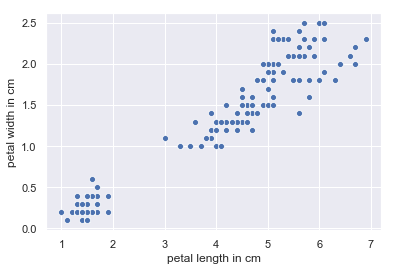

In [60]:
# scatter plot
sns.scatterplot(x='petal length in cm', y='petal width in cm', data=df)

Next, label the datapoints by color and add legend with the **hue** argument:

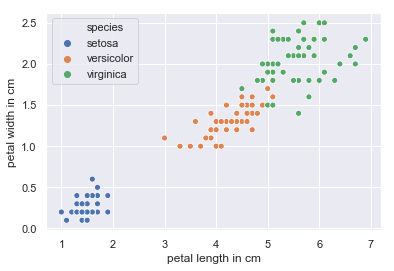

In [61]:
sns.scatterplot(x='petal length in cm', y='petal width in cm', 
                hue='species', data=df)

Next, plot scatter using lmplot with fit_reg=False:

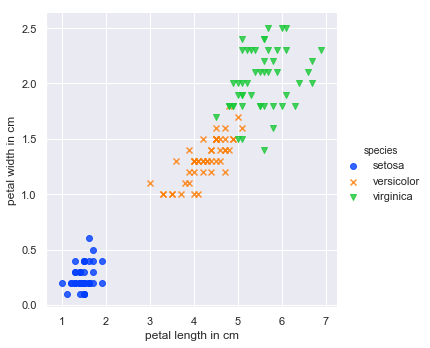

In [62]:
sns.lmplot(x='petal length in cm', y='petal width in cm', 
           hue="species", data=df, fit_reg=False,
           palette='bright',markers=['o','x','v'])

### Histogram

A histogram is a bucketed representation of a frequency distribution. Distributions were introduced in chapter 2. Histograms look like bar charts, but they are unique in that they display only a single variable with the y-axis representing the frequency. Let's look at an example on the iris dataset. 

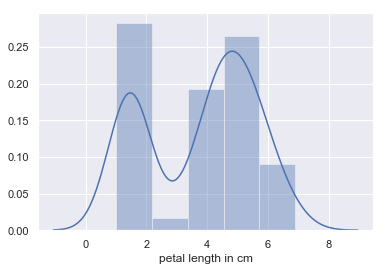

In [63]:
# histogram
sns.distplot(df['petal length in cm'])

Now let's specify a larger number of buckets/bins and try to represent the distribution shape more fully:

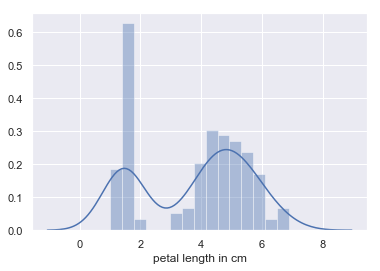

In [64]:
# histogram with 15 bins
sns.distplot(df['petal length in cm'], bins=15)

### Jointplot

Seaborn has a routine that combines a scatter plot and histogram for two variables. Let's look at an example on the iris dataset. 

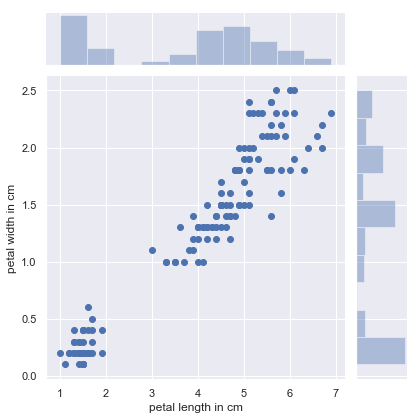

In [65]:
# jointplot
sns.jointplot(x='petal length in cm', y='petal width in cm', 
              data=df, kind='scatter', marginal_kws=dict(bins=10))

You can also plot the density estimates if it is easier to visualize than scatter points:

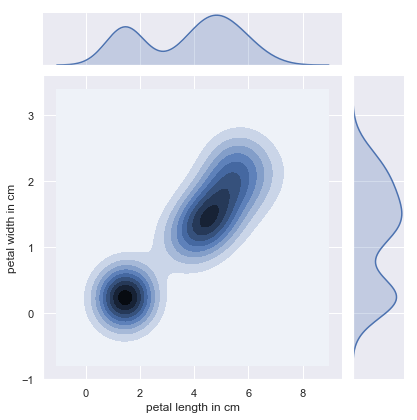

In [66]:
# jointplot with kde
sns.jointplot(x='petal length in cm', y='petal width in cm', 
              data=df, kind='kde')

### Violin Plot

One of the most effective plot for displaying distributions of a single variable broken down by class is a violin plot. These plots are names after their very obvious resemblance to violins.

Let's look at an example on the "sepal width" of the iris dataset:

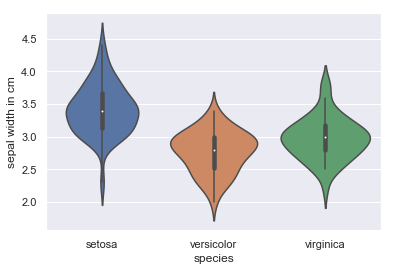

In [67]:
# violin plot
sns.violinplot(x='species',y='sepal width in cm', data=df)

The strength of these violin plots is seen when we plot the same violins for a different variable. Let's choose "pedal width":

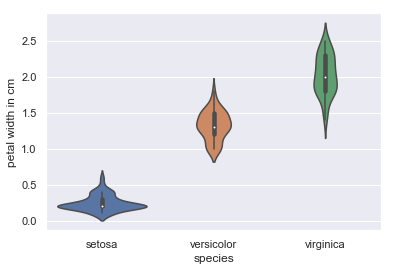

In [68]:
# violin plot
sns.violinplot(x='species',y='petal width in cm', data=df)

It's obvious to see that the "pedal width" violins are separated better than the "sepal width" violins. Since each violin represents a class, this means that the "pedal width" variable is better for separating classes from one another. 

### Pairplot

Seaborn's **pairplot** is a "routine" in the most literal sense. It will plot scatter plots of multiple variable against each other with histograms plotted in the diagonals. This is a good way to explore a new dataset when you don't know much about the relationships. It is the first place to start when entering the exploratory data analysis stage, especially if you are new to the problem statement. 

The pairplot is simple to build:

In [69]:
# load boston dataset
import sqlite3
sqlite_file = 'boston.db' 
conn = sqlite3.connect(sqlite_file)
df = pd.read_sql_query("select * from boston;", conn)
conn.close()
df.head()

DatabaseError: Execution failed on sql 'select * from boston;': no such table: boston

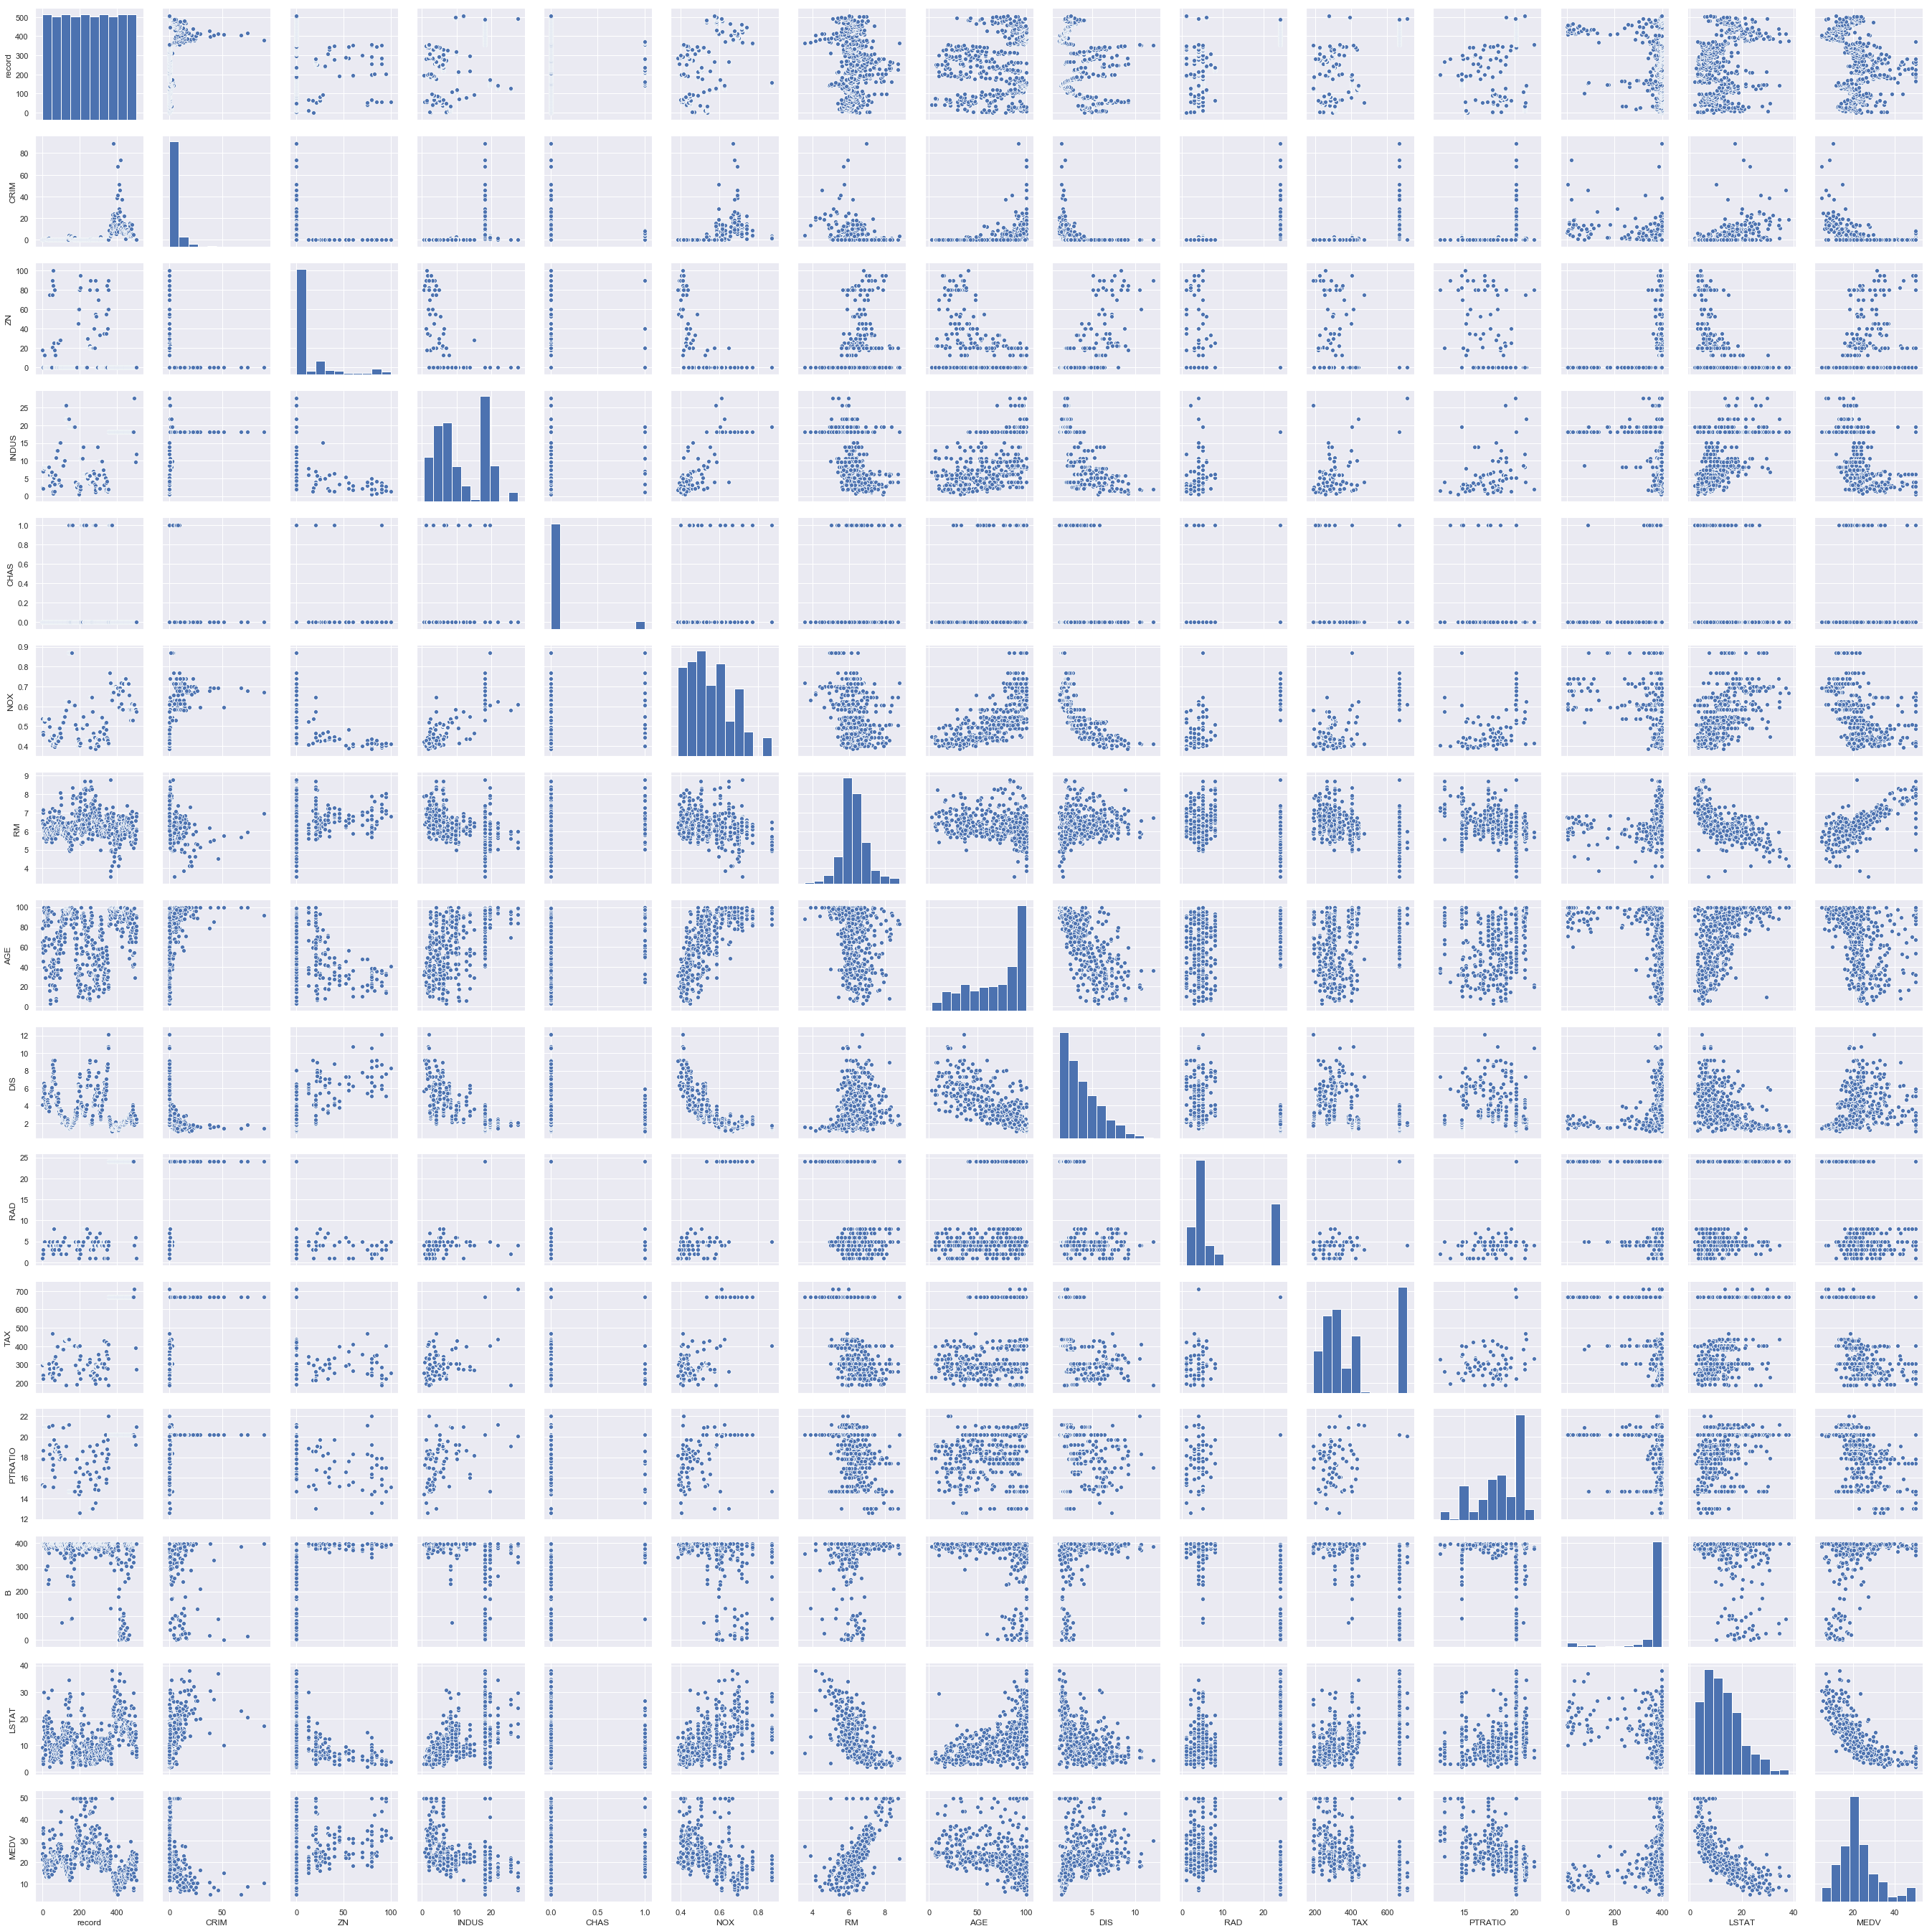

In [45]:
# pairplot with all features
sns.pairplot(data=df)

However this will overwhelm your console if the number of features is too large. See Above! 

We can use Pandas list-based column access to lower the number of variables in the pairplot and create a helpful plot. Let's load up the boston dataset and build a pairplot with five selected variables:

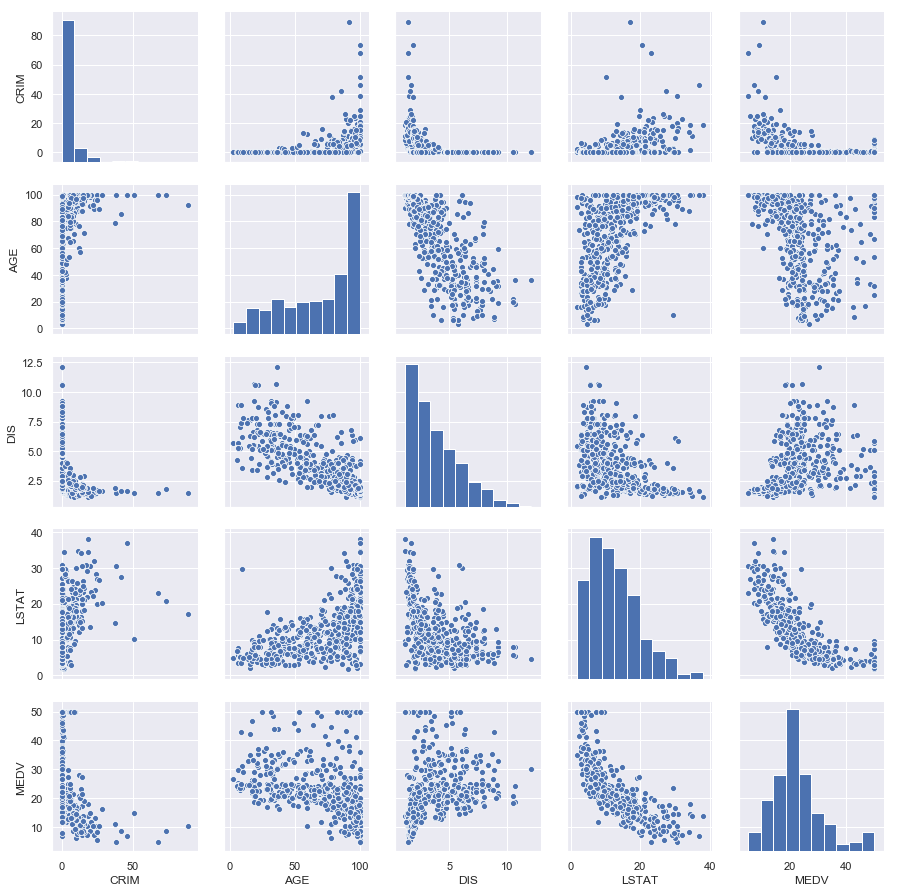

In [46]:
# pairplot with selected features
vars_to_plot = ['CRIM', 'AGE', 'DIS', 'LSTAT', 'MEDV']
sns.pairplot(data=df, vars=vars_to_plot)